# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D, BatchNormalization
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


## Importing matplotlib and plotting a sample image from train dataset

(60000, 28, 28)


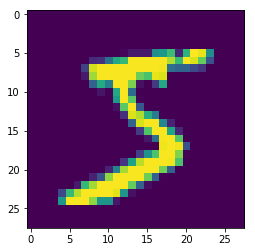

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

## Changing shape of the image . To keep in a format of gray scale image 
NOTE : if it is RGB Image then we need to change the shape to (num of samples X 28X28X3 )

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

## Convert the data to float data type

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

## One hot encoding 

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

# Final Model :
 
This code chunk creates sequential model by stacking convolutions to build CNN

__Shape of channels in each layer__
  
    channel     Kernel           channel
    28X28X1   | 3X3X1X20      -> 26X26X20
    26X26X20  | 3X3X32X24     -> 24X24X24
    
    24X24X24 -maxpooling-> 12X12X24
    
    12X12X24  | 3X3X24X26     -> 10X10X26
    
    10X10X26 -maxpooling-> 5X5X26   // this step saved us a lot of parameters now we can use 28 kernels for capturing more number of complex features in next layer
                                          
    5X5X26    | 3X3X26X28     -> 3X3X28
    3X3X28    | 3X3X28X10     -> 1X1X10
   
 __validation accuracy__ : 99.42% \
 __number of parameters__ : 19,296
 
 ## Logical explanation of architecture ??

__Why maxpooling after second and third layer ?__

- Basically we need to use sufficiently large number of kernels to capture the complex features at final layer
- But the constraint of 20000 parameters will not let us to use more number of parameters at the final layer if we dont use the maxpooling in proper way
- So we need to use max pooling as soon as possible to save more kernels till the end
- In the following CNN architucture, I have used maxpooling very sooner, as a result I managed to use 28 kernels in the final layer which captures complex features efficiently.

__Learning rate tweaking :__

- After 10 epocs i have gradually reduced the learning rate after each epoc.
- It  is bacause of over shooting problem from the global or lovcal minimun as shown in figure
![over shooting](images/over_shooting.jpeg)
- reducing the learning rate will slows dow the process of training and letting the model to settle in a good optimal state of weights

__NOTE__ : I could have use some different optmiser to do the same. But i chose to do it manually ,to see the results and get more intiution .

> __Doubt__ : I did not use 1X1 filter here because of the constraints. We are capturing very limited features in channels because of small trainable parameters. I thought filtering those channels could lead to more data loss. I have tried using 1X1 kernel but it did not turned out to be too useful in this architucture. Am i thinking correct ??

In [0]:
from keras.layers import Activation, MaxPooling2D

model = Sequential() 
model.add(Convolution2D(20, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(24, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(26, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(28, 3, 3, activation='relu'))
model.add(Convolution2D(10, 3, 3))
model.add(Flatten())
model.add(Activation('softmax'))

model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 26, 26, 20)        200       
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 24, 24, 24)        4344      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 12, 12, 24)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 10, 10, 26)        5642      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 5, 5, 26)          0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 3, 3, 28)          6580      
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 1, 1, 10)          2530      
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(26, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(28, (3, 3), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3))`
  del sys.path[0]


## training the model for 10 epocs

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1) #1
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Epoch 1/10
60000/60000 [==============================] - 20s 328us/step - loss: 0.1653 - acc: 0.9481
Epoch 2/10
60000/60000 [==============================] - 17s 289us/step - loss: 0.0538 - acc: 0.9832
Epoch 3/10
60000/60000 [==============================] - 17s 291us/step - loss: 0.0391 - acc: 0.9879
Epoch 4/10
60000/60000 [==============================] - 17s 288us/step - loss: 0.0308 - acc: 0.9903
Epoch 5/10
60000/60000 [==============================] - 18s 292us/step - loss: 0.0267 - acc: 0.9912
Epoch 6/10
60000/60000 [==============================] - 18s 292us/step - loss: 0.0214 - acc: 0.9930
Epoch 7/10
60000/60000 [==============================] - 17s 290us/step - loss: 0.0186 - acc: 0.9939
Epoch 8/10
60000/60000 [==============================] - 17s 290us/step - loss: 0.0151 - acc: 0.9952
Epoch 9/10
60000/60000 [==============================] - 18s 292us/step - loss: 0.0140 - acc: 0.9954
Epoch 10/10
60000/60000 [==============================] - 17s 290us/step - loss: 

In [0]:
## reducing the learning rate to _0.0005_ and training for 2 epocs

In [0]:
adam = keras.optimizers.Adam(lr=0.0005, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='categorical_crossentropy',
             optimizer=adam,
             metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=32, nb_epoch=2, verbose=1) #1
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/2
60000/60000 [==============================] - 20s 326us/step - loss: 0.0057 - acc: 0.9982
Epoch 2/2
60000/60000 [==============================] - 18s 297us/step - loss: 0.0034 - acc: 0.9990
[0.0313202614135379, 0.993]


## reducing the learning rate to 0.0003 and training for 2 epocs

In [0]:
adam = keras.optimizers.Adam(lr=0.0003, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='categorical_crossentropy',
             optimizer=adam,
             metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=32, nb_epoch=2, verbose=1) #1
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/2
60000/60000 [==============================] - 19s 318us/step - loss: 0.0020 - acc: 0.9995
Epoch 2/2
60000/60000 [==============================] - 18s 293us/step - loss: 0.0012 - acc: 0.9996
[0.03356551165942888, 0.9936]


## reducing the learning rate to 0.0001 and training for 3 epocs (reached accuracy of 99.42%)

__NOTE__ : Observe last line of the output cell where i printed validation accuracy __0.9942/1__

In [0]:
adam = keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='categorical_crossentropy',
             optimizer=adam,
             metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=32, nb_epoch=3, verbose=1) #1
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/3
60000/60000 [==============================] - 20s 325us/step - loss: 7.0454e-04 - acc: 0.9999
Epoch 2/3
60000/60000 [==============================] - 18s 293us/step - loss: 3.8843e-04 - acc: 0.9999
Epoch 3/3
60000/60000 [==============================] - 18s 294us/step - loss: 3.5672e-04 - acc: 1.0000
[0.03421079674355531, 0.9942]


__Code for collecting the layer names and kernels in each layer in `layer_dict` variable__

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

### Printing what each kernel captures from a given image.

* The task in the first assignment helped me understand whats is hapenning in this code. where we capture edges using kernels. I will explain about this in next cell 
* For a given kernel we are doing to gradient ascent to capture the highest value it produces in the given image at different positions of the image
* Then plot those values which are captured at different positions of image using matplotlib

__NOTE__ : [this](https://towardsdatascience.com/visual-interpretability-for-convolutional-neural-networks-2453856210ce) link have a decent explanation of whats actually hapenning

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_227'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))


## First layer filters

- Here if we observe __filter 0__ carefully ,we can observe it is capturing vertical edges.
  -  Its RF size is different from the original image, maybe because of maxpooling and other processing
- similarly almost every filter is able to capture imput image clearly .Because these are initial layers and have less RF as a result kernels are able to capture good amount of detailing from image
- We can observe the diminishing of detail in filter image as we move to sucessive layers because of more RF and complex features.


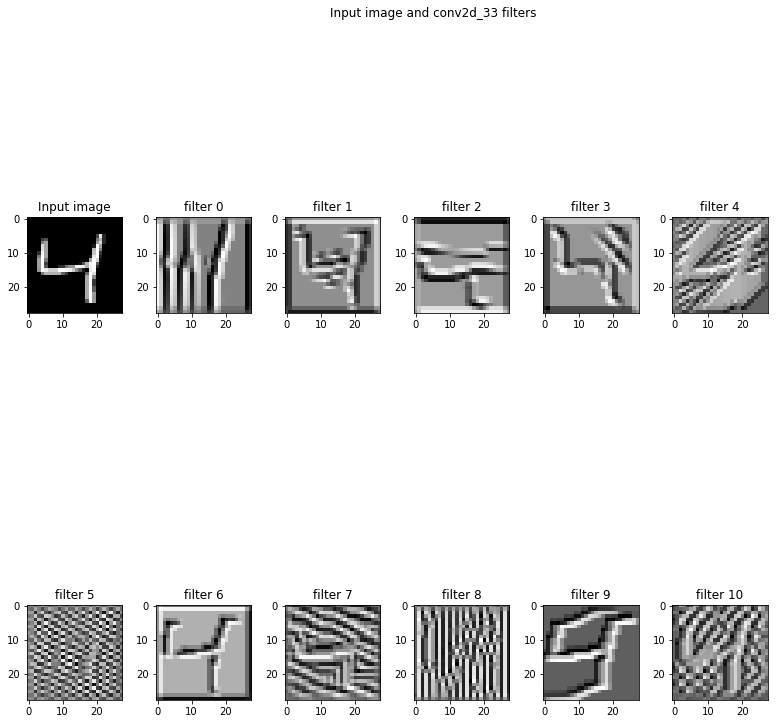

In [0]:
vis_img_in_filter(layer_name = 'conv2d_33')

### Here Filters capture more complex features than previous layer



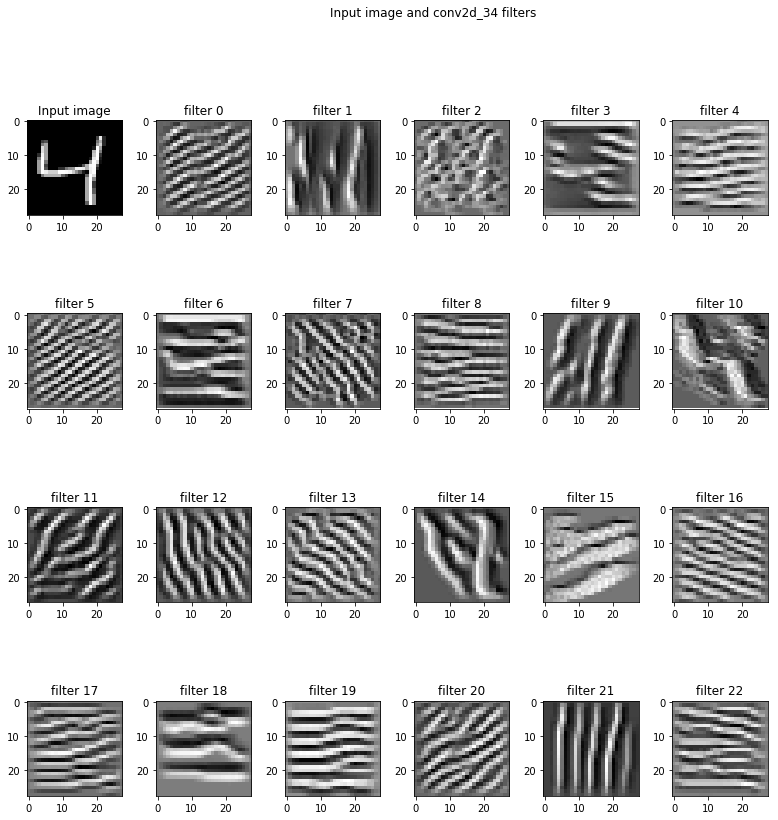

In [0]:
vis_img_in_filter(layer_name = 'conv2d_34' )

### Here Filters capture more complex features than previous layer



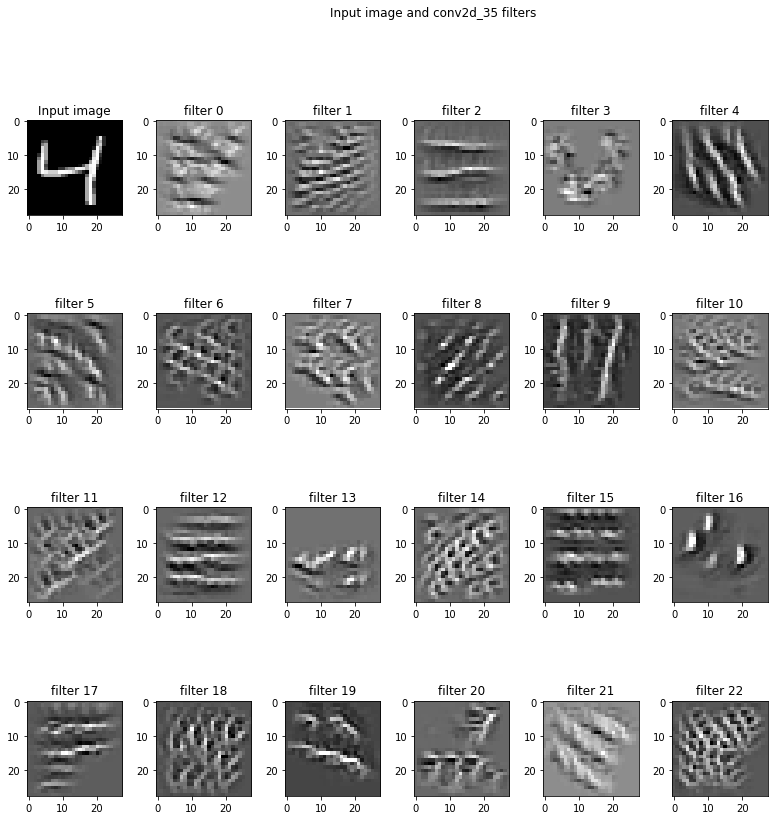

In [0]:
vis_img_in_filter(layer_name = 'conv2d_35' )

### Here Filters capture more complex features than previous layer



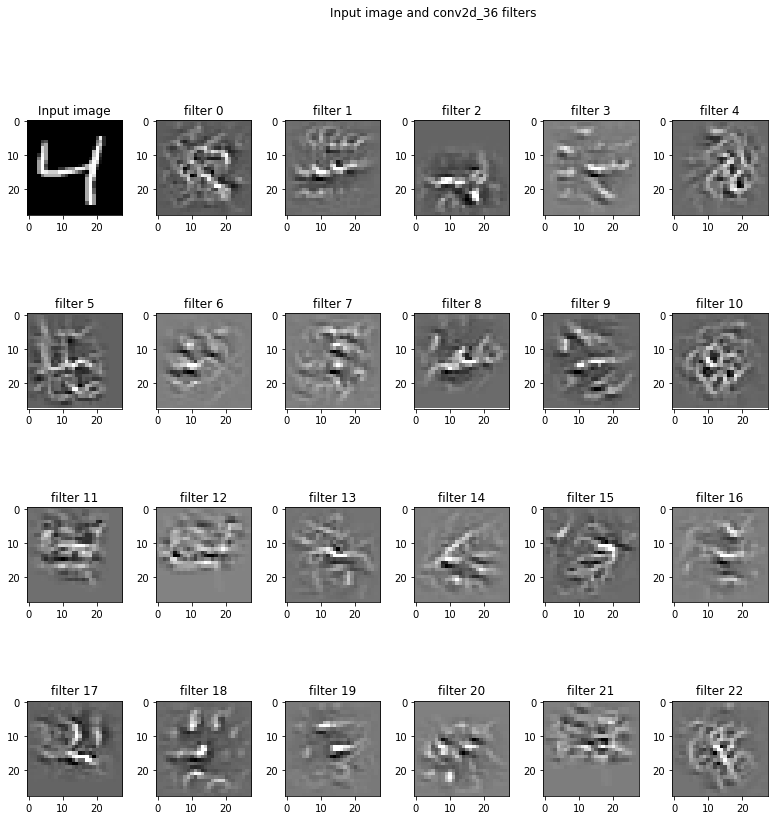

In [0]:
vis_img_in_filter(layer_name = 'conv2d_36')